In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Hack to get vscode to use my imports (Very weird, it was only getting some of my PYTHONPATHs)
import sys, os
sys.path.insert(0, os.environ["CSC500_ROOT_PATH"] + "/csc500-notebooks/utils")


In [20]:
# Example snippets for posterity
# g_index

# g.columns
# g[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]]
# g.columns
# g.index

# Grouping by parameters (minus seed) gives us the individual experiments as the groups
# p_group = p.groupby(parameter_columns_minus_seed)

# Can set a multi-index as well
# p_index = p.set_index(parameter_columns_minus_seed)
# p_index

# p["experiment_name"]

# Gett the max of each group
# idx = ["target_val_label_accuracy"].transform(max) == p["target_val_label_accuracy"]

# p_group.count()


# p[idx]

In [21]:
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
import copy

print(os.environ["PYTHONPATH"])
from series_utils.tl_1 import tl_1_Helper
from series_utils.tl_2 import tl_2_Helper
from series_utils.tl_3 import tl_3_Helper



from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

/mnt/wd500GB/CSC500/csc500-main/csc500-models:/mnt/wd500GB/CSC500/csc500-main/csc500-utils:/usr/local/lib/python3/dist-packages:/usr/local/lib/python3.6/dist-packages:/usr/local/lib/python3/dist-packages:/usr/local/lib/python3.6/dist-packages:


In [22]:
def set_nice_sb_style():
    matplotlib.rcParams.update({'font.size': 22})
    plt.style.use('seaborn-whitegrid')

def add_value_to_sb_bars(fg):
    # iterate through axes
    for ax in fg.axes.ravel():
        
        ax.tick_params(labelbottom=True)
        
        # add annotations
        for c in ax.containers:
            labels = [f'{(v.get_height()):.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
        ax.margins(y=0.2)

def add_x_val_to_sb_bars(fg):
    # iterate through axes
    for ax in fg.axes.ravel():
        
        ax.tick_params(labelbottom=True)
        
        # add annotations
        for c in ax.containers:
            labels = [f'{(v.get_height()):.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
        ax.margins(y=0.2)

In [23]:
helper_tl_1 = tl_1_Helper()

# Baseline TL results
Show variance in seeds

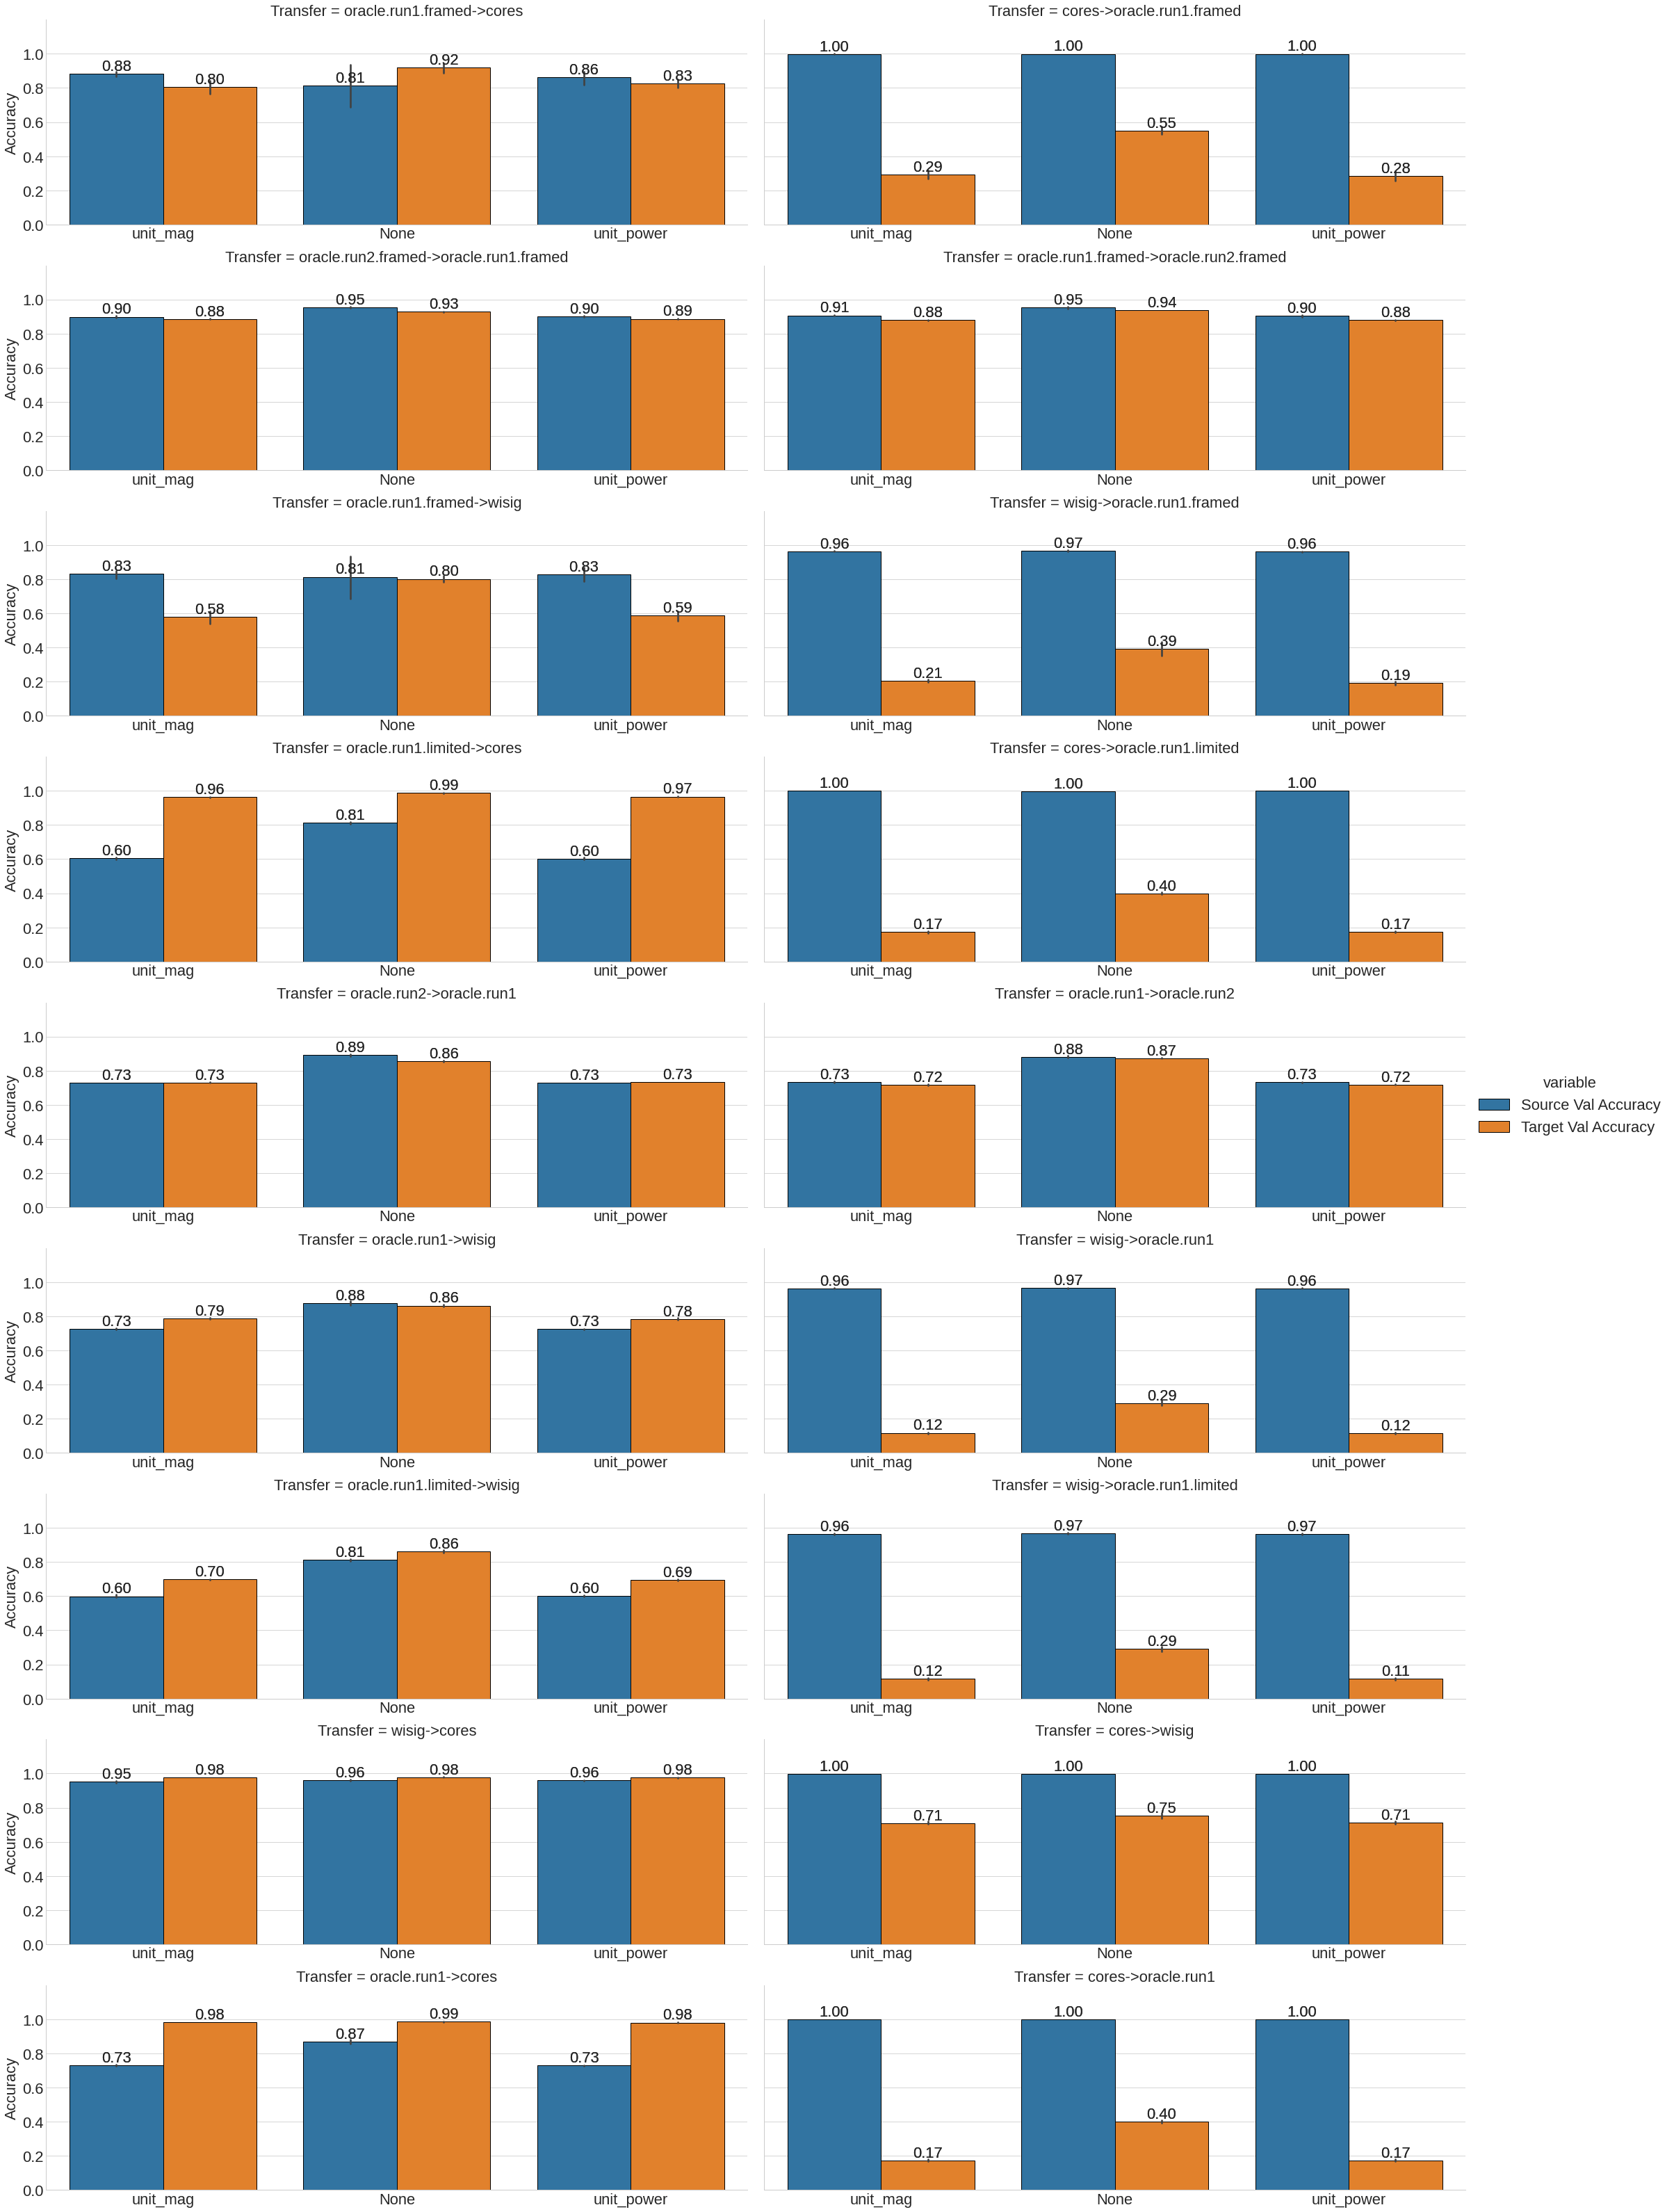

<Figure size 1080x3600 with 0 Axes>

In [24]:
p = helper_tl_1.get_all_trials()

m = pd.melt(p, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

# Baseline TL results by selecting best target accuracy

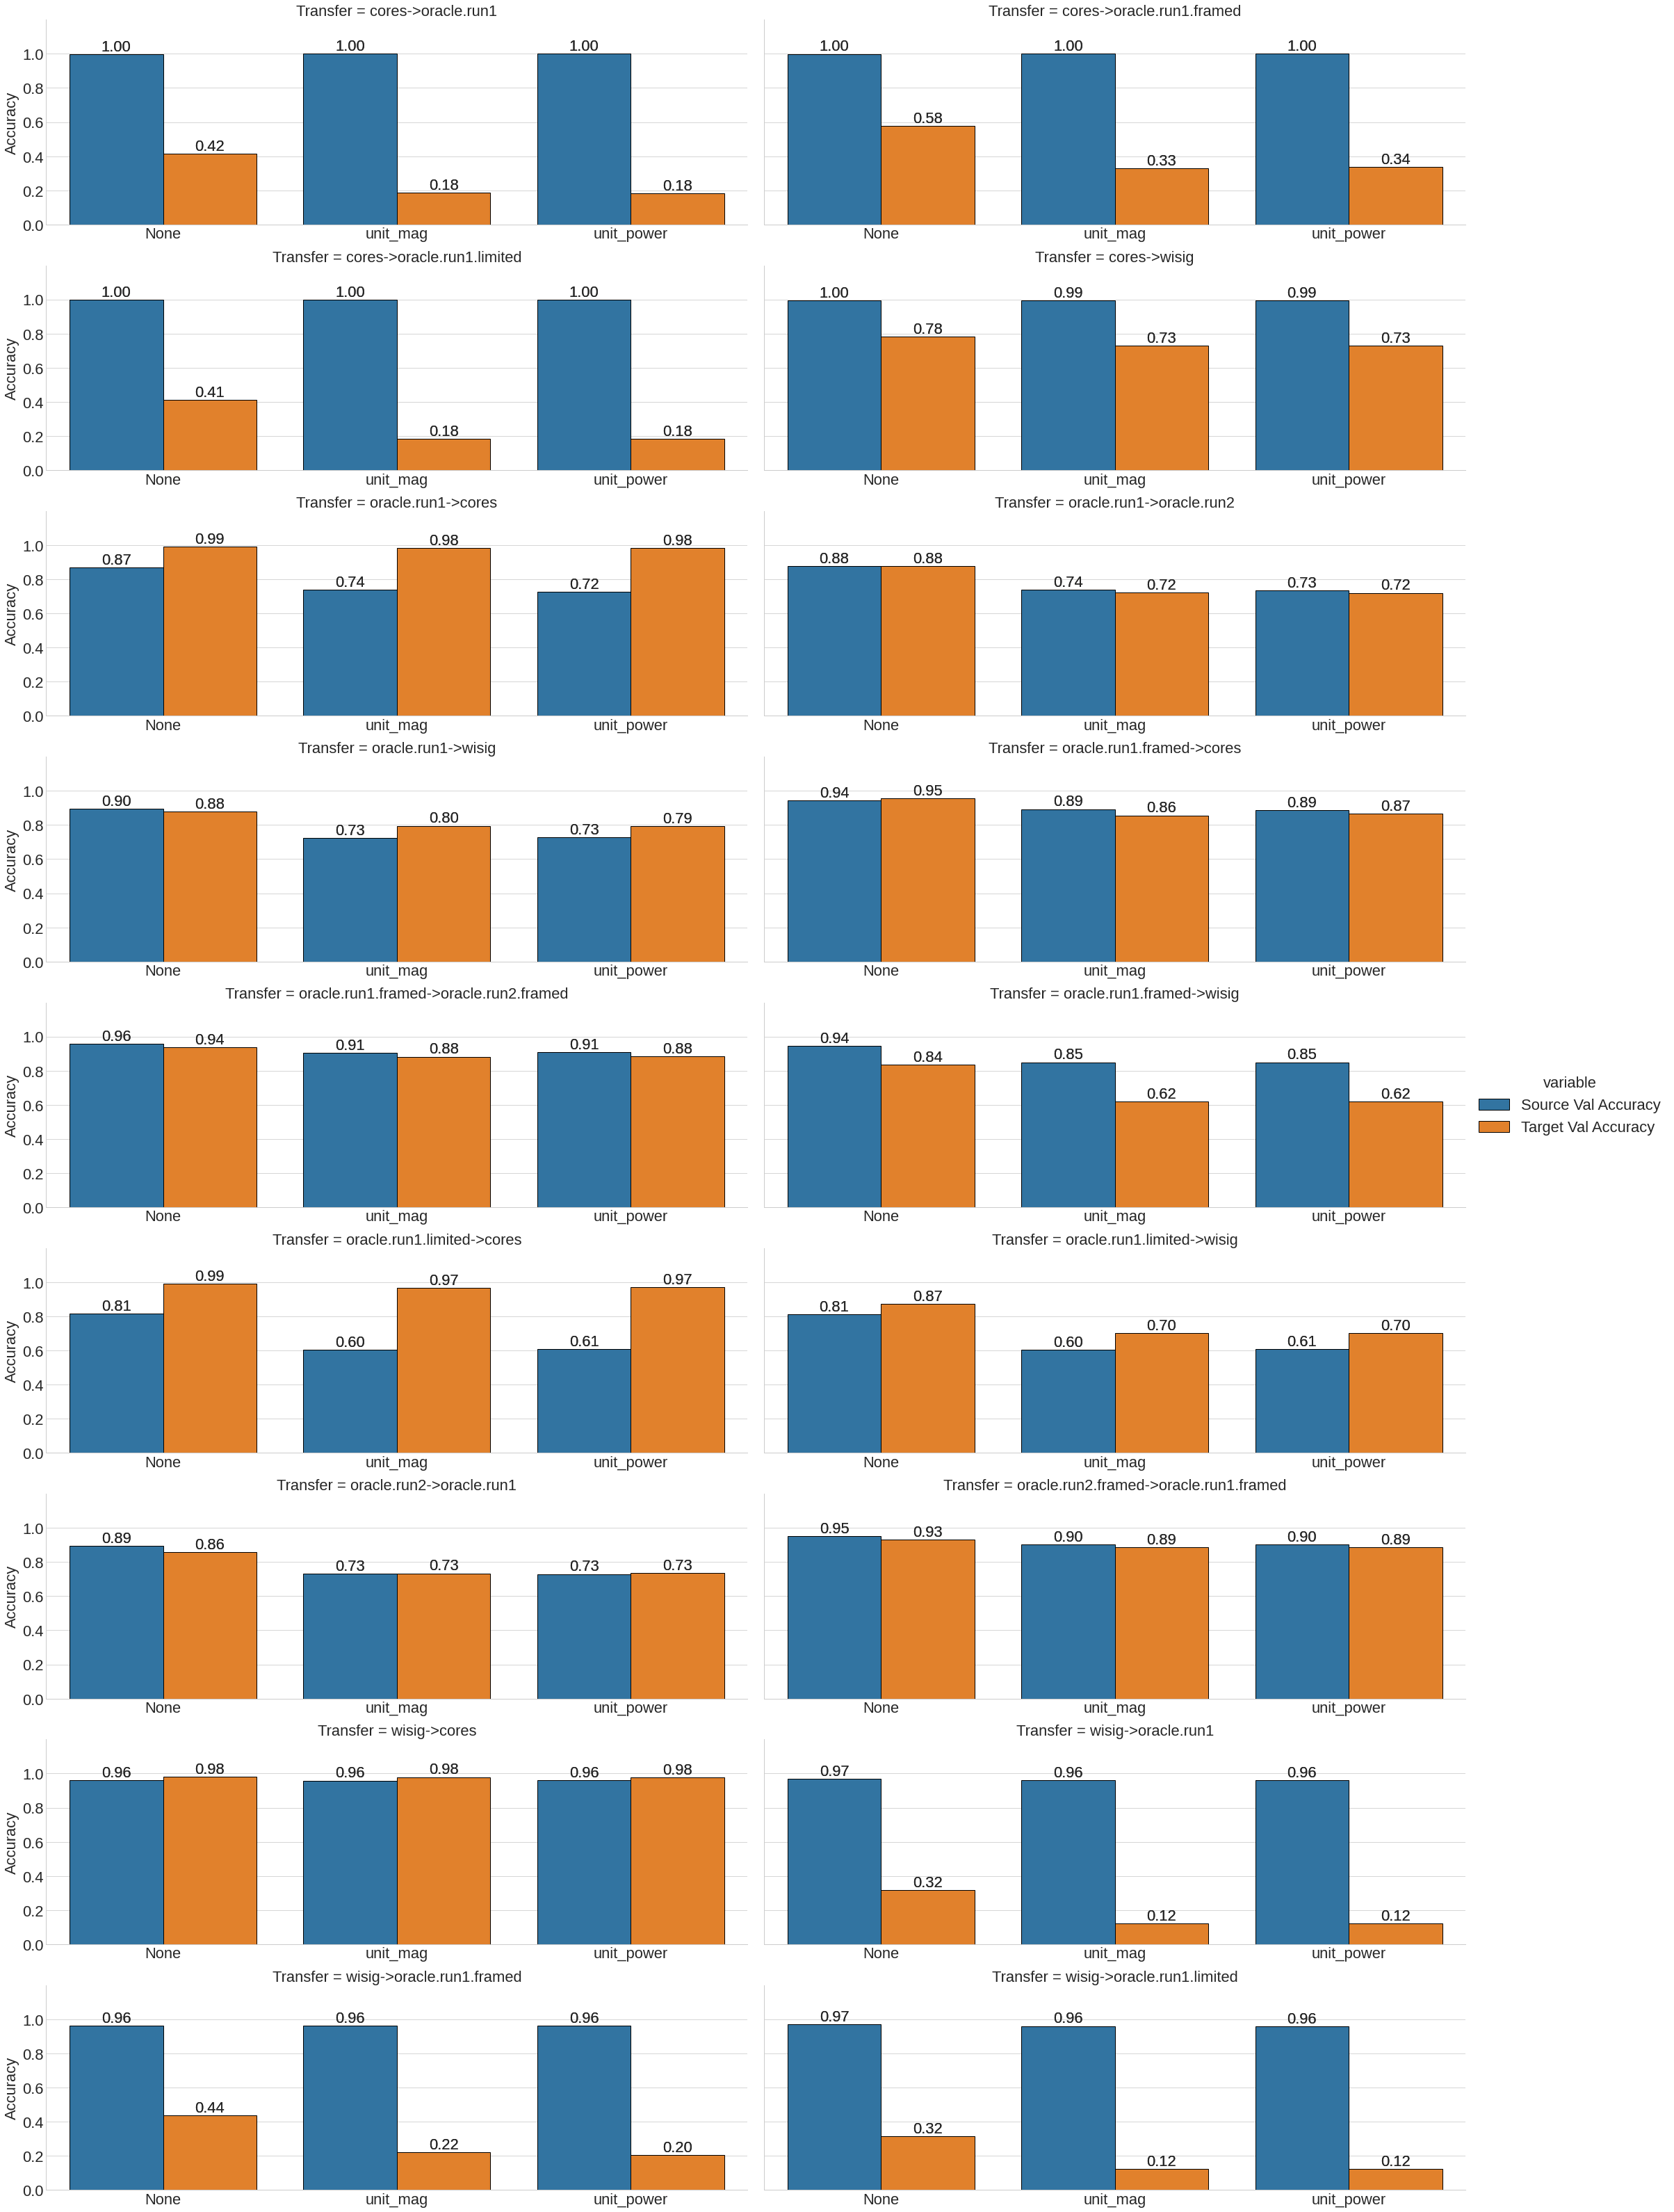

<Figure size 1080x3600 with 0 Axes>

In [25]:
i = helper_tl_1.get_best_trials()
m = pd.melt(i, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)


# Normalziation analysis
Virtually all datasets suffered in accuracy with normalization applied  
Some datasets are more sensitive to normalization than others.  
Magnitude and Power normalization show nearly identical effects.  
(Below chart shows raw data, one cell down shows a condensed version)

In [26]:


t = helper_tl_1.get_best_trials()
t = t.pivot(index=["Transfer"], columns=["x_transform"], values=["Source Val Accuracy", "Target Val Accuracy"])
# print(t.columns)
t["Source Mag Delta"]   =    t[("Source Val Accuracy", "unit_mag")] - t[("Source Val Accuracy", "None")]
t["Source Power Delta"] =    t[("Source Val Accuracy", "unit_power")] - t[("Source Val Accuracy", "None")]
t["Target Mag Delta"] =    t[("Target Val Accuracy", "unit_mag")] - t[("Target Val Accuracy", "None")]
t["Target Power Delta"] =    t[("Target Val Accuracy", "unit_power")] - t[("Target Val Accuracy", "None")]
t = t.sort_values("Target Mag Delta")
t


Source Val Accuracy            \
x_transform                                           None  unit_mag   
Transfer                                                               
cores->oracle.run1.framed                         0.998965  0.999250   
cores->oracle.run1                                0.998500  0.999287   
cores->oracle.run1.limited                        0.998500  0.999287   
oracle.run1.framed->wisig                         0.943229  0.849349   
wisig->oracle.run1.framed                         0.960830  0.961036   
wisig->oracle.run1                                0.968552  0.959873   
wisig->oracle.run1.limited                        0.968552  0.959873   
oracle.run1.limited->wisig                        0.812598  0.603451   
oracle.run1->oracle.run2                          0.875866  0.739336   
oracle.run2->oracle.run1                          0.894486  0.730540   
oracle.run1.framed->cores                         0.943229  0.892643   
oracle.run1->wisig                                0.895553  0.725195   
oracle.run1.framed->oracle.run2.framed            0.958105  0.905762   
cores->wisig                                      0.995330  0.994432   
oracle.run2.framed->oracle.run1.framed            0.951758  0.903027   
oracle.run1.limited->cores                        0.814193  0.603451   
oracle.run1->cores                                0.869017  0.738600   
wisig->cores                                      0.961140  0.958917   

                                                  Target Val Accuracy  \
x_transform                            unit_power                None   
Transfer                                                                
cores->oracle.run1.framed                0.999536            0.579199   
cores->oracle.run1                       0.999215            0.415306   
cores->oracle.run1.limited               0.999215            0.410872   
oracle.run1.framed->wisig                0.849349            0.835806   
wisig->oracle.run1.framed                0.963183            0.435579   
wisig->oracle.run1                       0.959609            0.317826   
wisig->oracle.run1.limited               0.959609            0.316016   
oracle.run1.limited->wisig               0.608952            0.873910   
oracle.run1->oracle.run2                 0.734720            0.875788   
oracle.run2->oracle.run1                 0.729681            0.859440   
oracle.run1.framed->cores                0.888346            0.954536   
oracle.run1->wisig                       0.728398            0.878402   
oracle.run1.framed->oracle.run2.framed   0.909277            0.938053   
cores->wisig                             0.994432            0.783347   
oracle.run2.framed->oracle.run1.framed   0.902279            0.930924   
oracle.run1.limited->cores               0.609310            0.990990   
oracle.run1->cores                       0.724863            0.990500   
wisig->cores                             0.958984            0.980963   

                                                            Source Mag Delta  \
x_transform                             unit_mag unit_power                    
Transfer                                                                       
cores->oracle.run1.framed               0.327897   0.336426         0.000285   
cores->oracle.run1                      0.184824   0.183698         0.000787   
cores->oracle.run1.limited              0.184733   0.184310         0.000787   
oracle.run1.framed->wisig               0.618936   0.617319        -0.093880   
wisig->oracle.run1.framed               0.221875   0.203353         0.000206   
wisig->oracle.run1                      0.123516   0.121693        -0.008679   
wisig->oracle.run1.limited              0.124642   0.123893        -0.008679   
oracle.run1.limited->wisig              0.701030   0.703158        -0.209147   
oracle.run1->oracle.run2                0.721283   0.720527        -0.136530   
oracle.run2->oracle.run1        

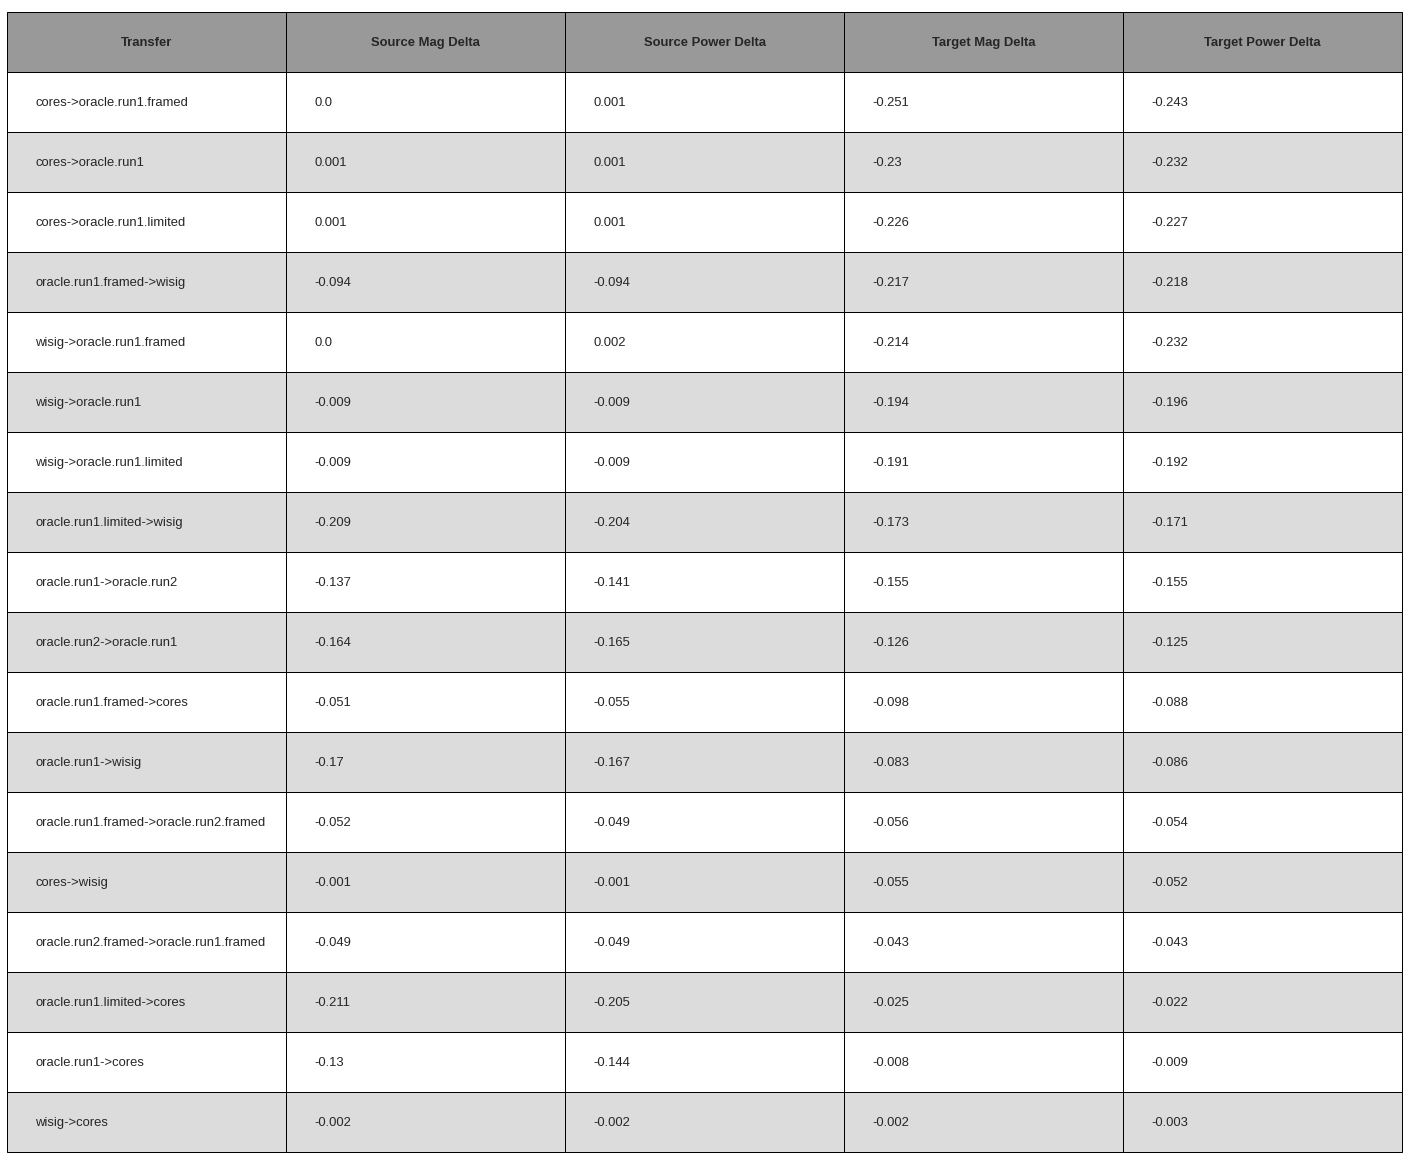

In [27]:
import copy
import numpy as np
tt = copy.deepcopy(t)
tt.columns = t.columns.droplevel(1)
tt = tt[["Source Mag Delta", "Source Power Delta", "Target Mag Delta", "Target Power Delta"]]
tt = tt.reset_index()
tt = tt.round(3)

fig, ax = plt.subplots(1)
fig.set_size_inches(10,5)

# For the alternating row colors
z = np.zeros([len(tt.index), len(tt.columns)], dtype=object)
z[1::2] = "#DCDCDC"
z[0::2] = "white"

tab = ax.table(
    cellText=tt.values, colLabels=tt.columns, 
    loc='best', cellLoc='left', 
    colColours=[(.6, .6, .6)] * 10, cellColours=z,
    colWidths=[0.1]*5
)
# tab = ax.table(cellText=tt.values, colLabels=tt.columns, )
ax.set_axis_off()
tab.auto_set_font_size(True)
tab.set_fontsize(20)
# tab.scale(1.5, 2)
tab.scale(5, 5)
# fig.set_tight_layout(True)

from matplotlib.font_manager import FontProperties

for (row, col), cell in tab.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Analysis of packet isolation
NB: I called this "framing" in the code.  
Isolating packets reduces the number of samples in the ORACLE datasets from 10k to 2k.  
Experiments with the dataset ORACLE.limited are using 2k examples from non-isolated ORACLE (this acts as a control)  


## CORES
CORES->ORACLE sees ~15% boost in target accuracy when isolating packets  
ORACLE->CORES sees a ~10% reduction in target accuracy, but a ~30% boost in source accuracy.  
I do not have a great explanation for this.

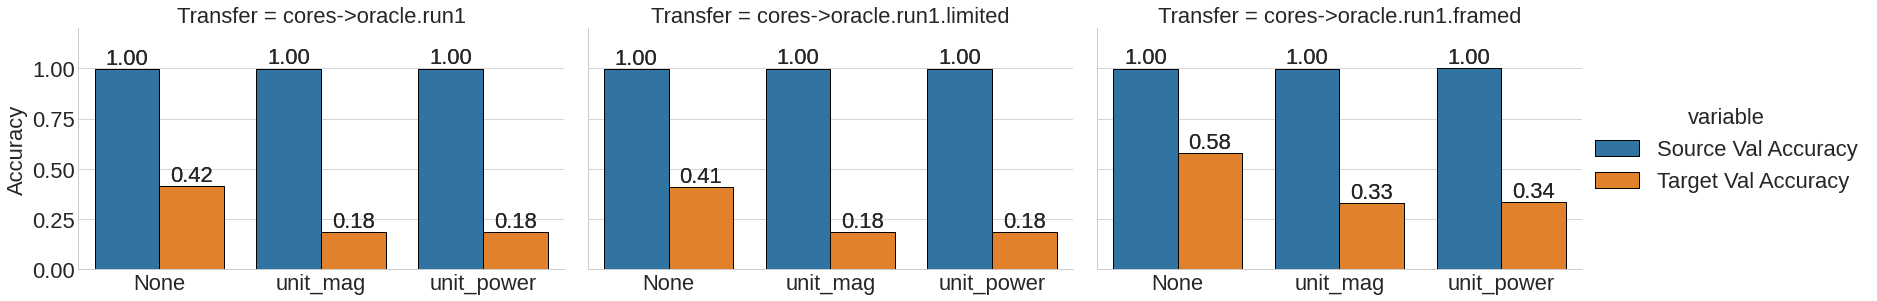

<Figure size 1080x3600 with 0 Axes>

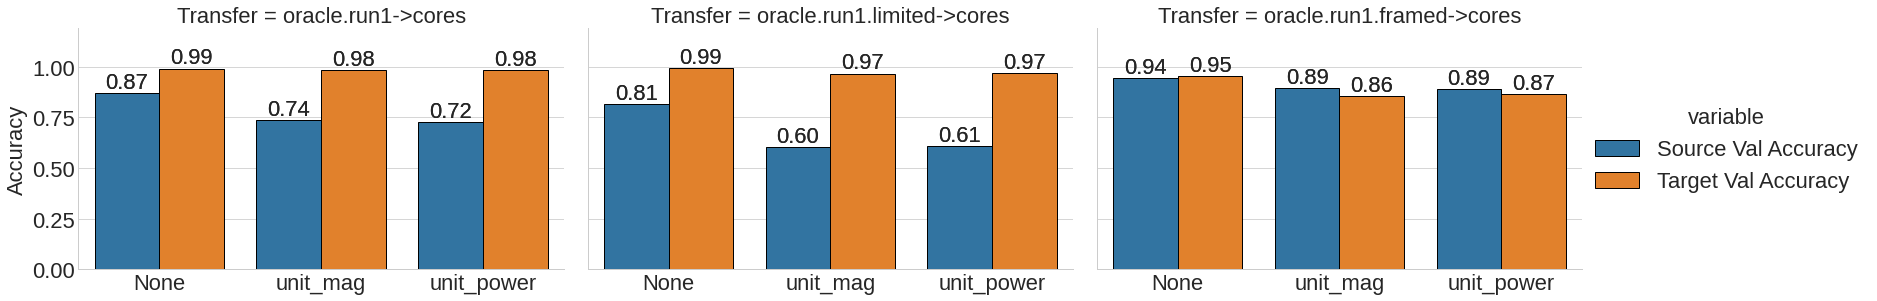

In [28]:
t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "cores->oracle.run1") | (t["Transfer"] == "cores->oracle.run1.limited") | (t["Transfer"] == "cores->oracle.run1.framed")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=3, edgecolor = "black",
                        col_order=["cores->oracle.run1", "cores->oracle.run1.limited", "cores->oracle.run1.framed"]
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)


####


t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "oracle.run1->cores") | (t["Transfer"] == "oracle.run1.limited->cores") | (t["Transfer"] == "oracle.run1.framed->cores")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=3, edgecolor = "black",
                        col_order=["oracle.run1->cores","oracle.run1.limited->cores","oracle.run1.framed->cores"]
                )
fg.set_xlabels('')
# plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

## WISIG
In general WISIG performs worse than CORES when transfer learning with ORACLE (in either direction).  
We see effects similar to CORES, in that WISIG->ORACLE target accuracy is boosted by packet isolation, and ORACLE->WISIG target accuracy suffers slightly, but source accuracy is boosted immensely.

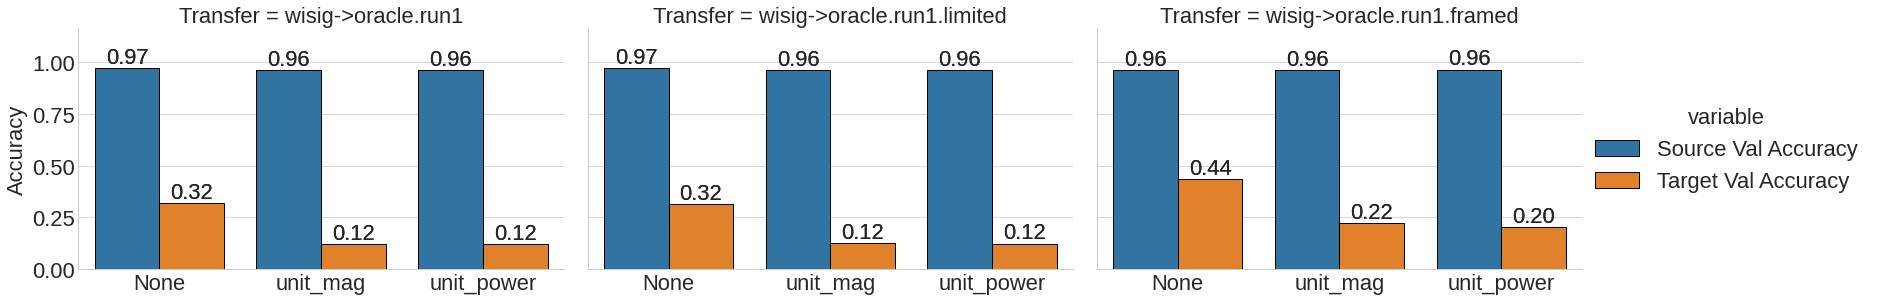

<Figure size 1080x3600 with 0 Axes>

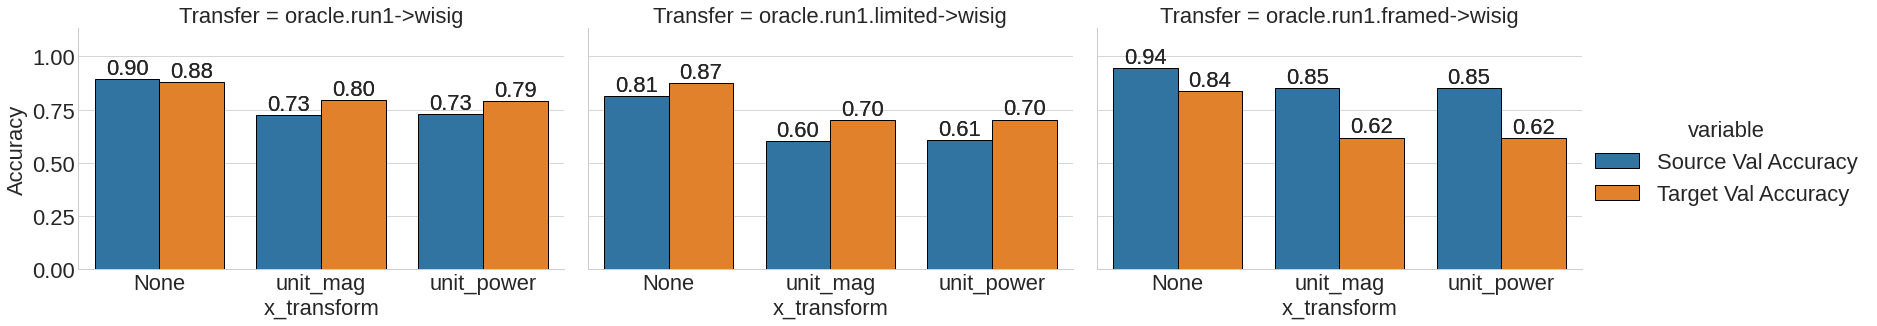

In [29]:
t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "wisig->oracle.run1") | (t["Transfer"] == "wisig->oracle.run1.limited") | (t["Transfer"] == "wisig->oracle.run1.framed")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=3, edgecolor = "black",
                        col_order=["wisig->oracle.run1", "wisig->oracle.run1.limited", "wisig->oracle.run1.framed"]
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)


####


t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "oracle.run1->wisig") | (t["Transfer"] == "oracle.run1.limited->wisig") | (t["Transfer"] == "oracle.run1.framed->wisig")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=3, edgecolor = "black",
                        col_order=["oracle.run1->wisig","oracle.run1.limited->wisig","oracle.run1.framed->wisig"]
                )


set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

# Effects of combining WISIG and CORES for TL
We see if combining WISIG and CORES will boost TL performance.  
The theory behind this is that a greater number and diversity of examples may train better.  
  
Results show that when combining wisig and oracle, accuracy is the average between the two datasets.  
Put another way, accuracy is boosted from the perspective of WISIG only, and degraded from the persepective of CORES only.

/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_2v2


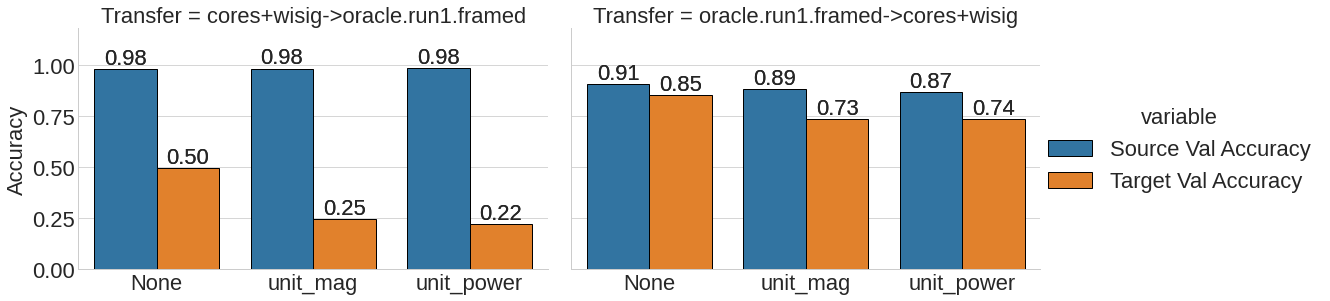

<Figure size 1080x3600 with 0 Axes>

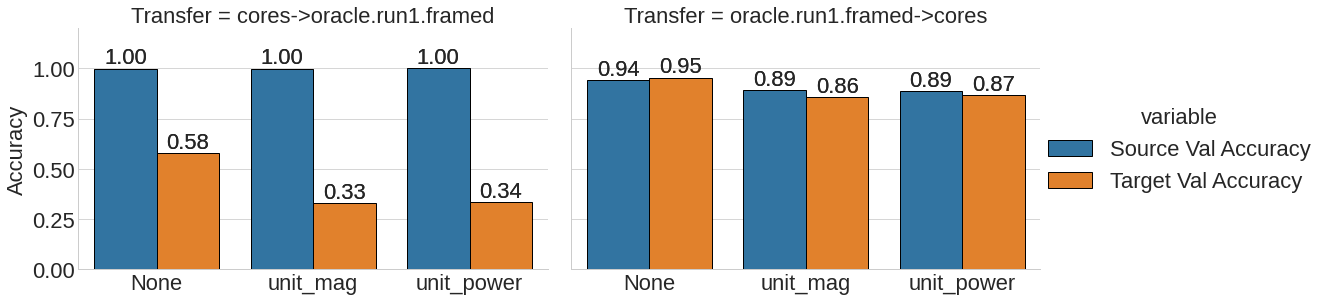

<Figure size 1080x3600 with 0 Axes>

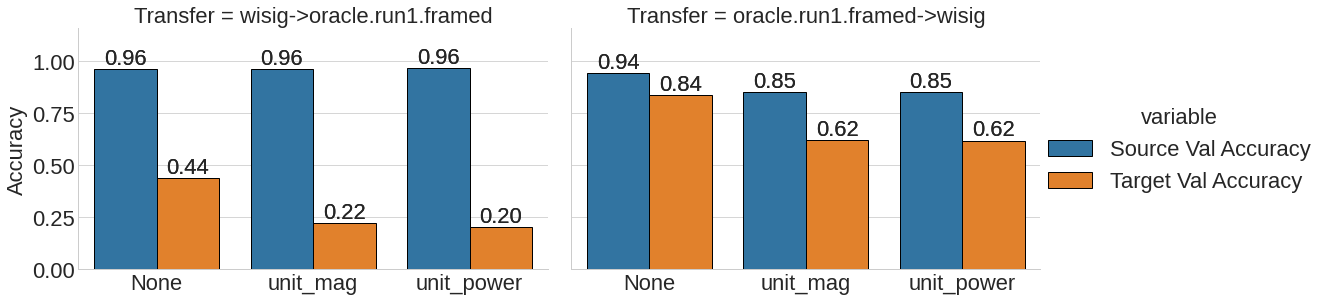

<Figure size 1080x3600 with 0 Axes>

In [30]:
helper_tl_2 = tl_2_Helper()

i = helper_tl_2.get_best_trials()
m = pd.melt(i, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

#######


t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "cores->oracle.run1.framed") | (t["Transfer"] == "oracle.run1.framed->cores")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=2, edgecolor = "black",
                        col_order=["cores->oracle.run1.framed", "oracle.run1.framed->cores"]
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)


####


t = helper_tl_1.get_best_trials()
t = t[(t["Transfer"] == "wisig->oracle.run1.framed") | (t["Transfer"] == "oracle.run1.framed->wisig")]
m = pd.melt(t, 
        id_vars=["Transfer", "x_transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x='x_transform', col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=1.5, col_wrap=2, edgecolor = "black",
                        col_order=["wisig->oracle.run1.framed", "oracle.run1.framed->wisig"]
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

# Analysis of signal shapes (PLACEHOLDER)
- TODO: Analyze signals of the datasets, postulate why WISIG performs worse than cores when ostensibly it's near identical to CORES

# Analysis of tl_3 (Advanced post processing)

In [31]:
helper_tl_3 = tl_3_Helper()

t = helper_tl_3.get_best_trials()

print(t.columns)
print("Available target transforms:", t["target_x_transform"].unique())
print("Available source transforms:", t["source_x_transform"].unique())


/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2
Index(['source_name', 'target_name', 'source_x_transform',
       'target_x_transform', 'experiment_name', 'history', 'dataset_metrics',
       'series_name', 'device', 'lr', 'x_shape', 'n_shot', 'n_query',
       'train_k_factor', 'val_k_factor', 'test_k_factor',
       'torch_default_dtype', 'n_epoch', 'patience', 'criteria_for_best',
       'x_net', 'NUM_LOGS_PER_EPOCH', 'BEST_MODEL_PATH', 'n_way', 'datasets',
       'seed', 'dataset_seed', 'source_test_label_accuracy',
       'source_test_label_loss', 'target_test_label_accuracy',
       'target_test_label_loss', 'Source Val Accuracy',
       'source_val_label_loss', 'Target Val Accuracy', 'target_val_label_loss',
       'total_epochs_trained', 'total_experiment_time_secs', 'confusion',
       'per_domain_accuracy', 'Transfer'],
      dtype='object')
Available target transforms: ['take(200),upsample(25e6)' 'jitter(1),take(200),upsample(25e6)'
 'jitter(10),take(200)

In [32]:
t

,source_name,target_name,source_x_transform,target_x_transform,experiment_name,history,dataset_metrics,series_name,device,lr,...,target_test_label_loss,Source Val Accuracy,source_val_label_loss,Target Val Accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,confusion,per_domain_accuracy,Transfer
0,cores,oracle.run1.framed,"filter(10e6),take(200)","take(200),upsample(25e6)",tl_3-filterv2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, ...","{'source': {'train': {'n_unique_x': 175219, 'n...",tl_3v2,cuda,0.0001,...,1.462497,0.999429,0.006738,0.566862,1.461652,12,3390.758717,"{'C_5': {'26': {'26': 24}, '7': {'7': 32}, '56...","{'C_5': {'accuracy': 0.9994762569832403, 'sour...",cores->oracle.run1.framed
1,cores,oracle.run1.framed,"jitter(1),filter(10e6),take(200)","jitter(1),take(200),upsample(25e6)",tl_3-jitter1v2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, ...","{'source': {'train': {'n_unique_x': 175200, 'n...",tl_3v2,cuda,0.0001,...,1.349591,0.998894,0.024875,0.550749,1.347984,14,4348.330611,"{'C_3': {'43': {'43': 128}, '9': {'9': 150}, '...","{'C_3': {'accuracy': 0.9989098837209303, 'sour...",cores->oracle.run1.framed
2,cores,oracle.run1.framed,"jitter(10),filter(10e6),take(200)","jitter(10),take(200),upsample(25e6)",tl_3-jitter10v2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7], 'trai...","{'source': {'train': {'n_unique_x': 175189, 'n...",tl_3v2,cuda,0.0001,...,1.801961,0.998181,0.010985,0.496029,1.807957,7,1110.935873,"{'C_3': {'43': {'43': 128}, '9': {'9': 150}, '...","{'C_3': {'accuracy': 0.9992732558139535, 'sour...",cores->oracle.run1.framed
3,cores,oracle.run1.framed,"jitter(5),filter(10e6),take(200)","jitter(5),take(200),upsample(25e6)",tl_3-jitter5v2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, ...","{'source': {'train': {'n_unique_x': 175168, 'n...",tl_3v2,cuda,0.0001,...,1.506992,0.999321,0.011541,0.477181,1.511394,13,1990.239567,"{'C_2': {'21': {'21': 120}, '4': {'4': 130}, '...","{'C_2': {'accuracy': 0.9994673295454546, 'sour...",cores->oracle.run1.framed
4,cores,oracle.run1.framed,take(200),"take(200),upsample(25e6)",tl_3Av2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9],...","{'source': {'train': {'n_unique_x': 175135, 'n...",tl_3v2,cuda,0.0001,...,1.563632,0.999251,0.010492,0.576497,1.563455,9,1390.660190,"{'C_3': {'43': {'43': 128}, '9': {'9': 150}, '...","{'C_3': {'accuracy': 0.9992732558139535, 'sour...",cores->oracle.run1.framed
5,cores,oracle.run1.framed,"unit_mag,filter(10e6),take(200)","unit_mag,take(200),upsample(25e6)",tl_3-filterv2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6], 'train_l...","{'source': {'train': {'n_unique_x': 175171, 'n...",tl_3v2,cuda,0.0001,...,1.939295,0.998570,0.009667,0.354297,1.937104,6,1713.017433,"{'C_2': {'21': {'21': 120}, '4': {'4': 130}, '...","{'C_2': {'accuracy': 0.9985795454545454, 'sour...",cores->oracle.run1.framed
6,cores,oracle.run1.framed,"unit_mag,jitter(1),filter(10e6),take(200)","unit_mag,jitter(1),take(200),upsample(25e6)",tl_3-jitter1v2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9],...","{'source': {'train': {'n_unique_x': 175160, 'n...",tl_3v2,cuda,0.0001,...,2.115361,0.999393,0.072875,0.375000,2.092987,9,2839.061502,"{'C_4': {'42': {'42': 32}, '0': {'0': 80}, '1'...","{'C_4': {'accuracy': 0.998877245508982, 'sourc...",cores->oracle.run1.framed
7,cores,oracle.run1.framed,"unit_mag,jitter(10),filter(10e6),take(200)","unit_mag,jitter(10),take(200),upsample(25e6)",tl_3-jitter10v2:cores -> oracle.run1.framed,"{'epoch_indices': [1, 2, 3, 4, 5], 'train_labe...","{'source': {'train': {'n_unique_x': 175169, 'n...",tl_3v2,cuda,0.0001,...,1.654898,0.996718,0.015414,0.400553,1.659268,5,888.323892,"{'C_3': {'43': {'43': 128}, '9': {'9': 150}, '...","{'C_3': {'accuracy': 0.9983648255813954, 'sour...",cores->oracle.run1.framed
8,cores,oracle.run1.framed,"unit_ma

In [33]:
"""
Will dowselect, selects all normalization schemes
"""
def get_tl_3_trials(df, source, source_transform, target, target_transform):
    if source_transform != None:
        s_t = [
            "unit_mag,"+source_transform,
            "unit_power,"+source_transform,
            source_transform
        ]

    if target_transform != None:
        t_t = [
            "unit_mag,"+target_transform,
            "unit_power,"+target_transform,
            target_transform
        ]

    idx = df.apply(lambda x: True, axis=1)
    
    if source != None:
        idx = idx & df.apply(
            lambda x:
                source in x["source_name"],
            axis=1
        )
    if target != None:
        idx = idx & df.apply(
            lambda x:
                target in x["target_name"],
            axis=1
        )
    if source_transform != None:
        idx = idx & df.apply(
            lambda x:
                x["source_x_transform"] in s_t,
            axis=1
        )
    if target_transform != None:
        idx = idx & df.apply(
            lambda x:
                x["target_x_transform"] in t_t,
            axis=1
        )

    return df[idx].copy(deep=True)

def make_transform_string(row):
    if "unit_mag" in row["source_x_transform"]: return "unit_mag"
    if "unit_power" in row["source_x_transform"]: return "unit_power"
    else: return "None"

/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2


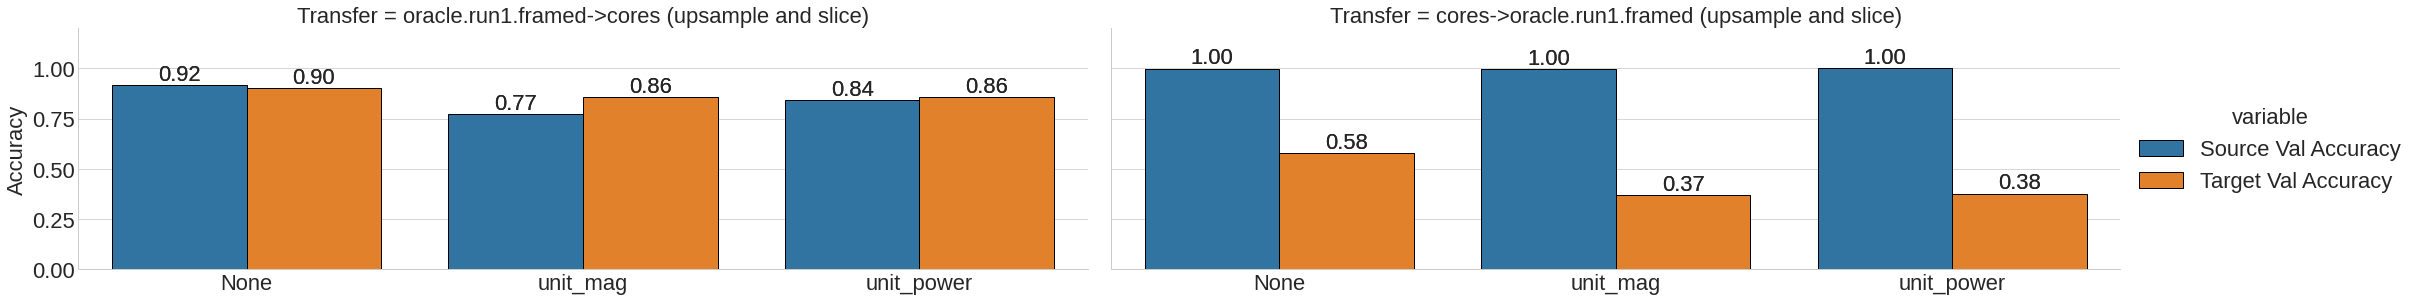

<Figure size 1080x3600 with 0 Axes>

In [34]:
t = helper_tl_3.get_best_trials()
t_A = get_tl_3_trials(t, "oracle.run1.framed", "take(200),upsample(25e6)", "cores", "take(200)")
t_A["Transfer"] = "oracle.run1.framed->cores (upsample and slice)"
t_A["Transform"] = t_A.apply(make_transform_string, axis=1)

t_B = get_tl_3_trials(t, "cores", "take(200)", "oracle.run1.framed", "take(200),upsample(25e6)")
t_B["Transfer"] = "cores->oracle.run1.framed (upsample and slice)"
t_B["Transform"] = t_B.apply(make_transform_string, axis=1)

t_f = pd.concat([t_A, t_B])

m = pd.melt(t_f, 
        id_vars=["Transfer", "Transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x="Transform", col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black",
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)


/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2


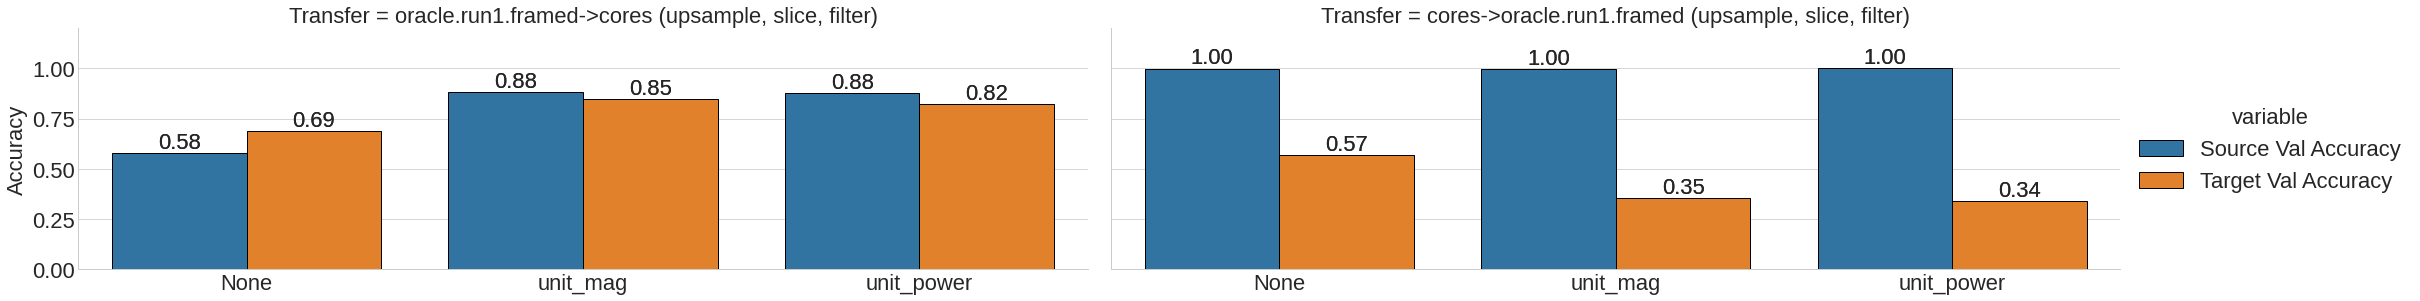

<Figure size 1080x3600 with 0 Axes>

In [39]:
t = helper_tl_3.get_best_trials()
t_A = get_tl_3_trials(t, "oracle.run1.framed", "take(200),upsample(25e6)", "cores", "filter(10e6),take(200)")
t_A["Transfer"] = "oracle.run1.framed->cores (upsample, slice, filter)"
t_A["Transform"] = t_A.apply(make_transform_string, axis=1)

t_B = get_tl_3_trials(t, "cores", "filter(10e6),take(200)", "oracle.run1.framed", "take(200),upsample(25e6)")
t_B["Transfer"] = "cores->oracle.run1.framed (upsample, slice, filter)"
t_B["Transform"] = t_B.apply(make_transform_string, axis=1)

t_f = pd.concat([t_A, t_B])

m = pd.melt(t_f, 
        id_vars=["Transfer", "Transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x="Transform", col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black",
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2


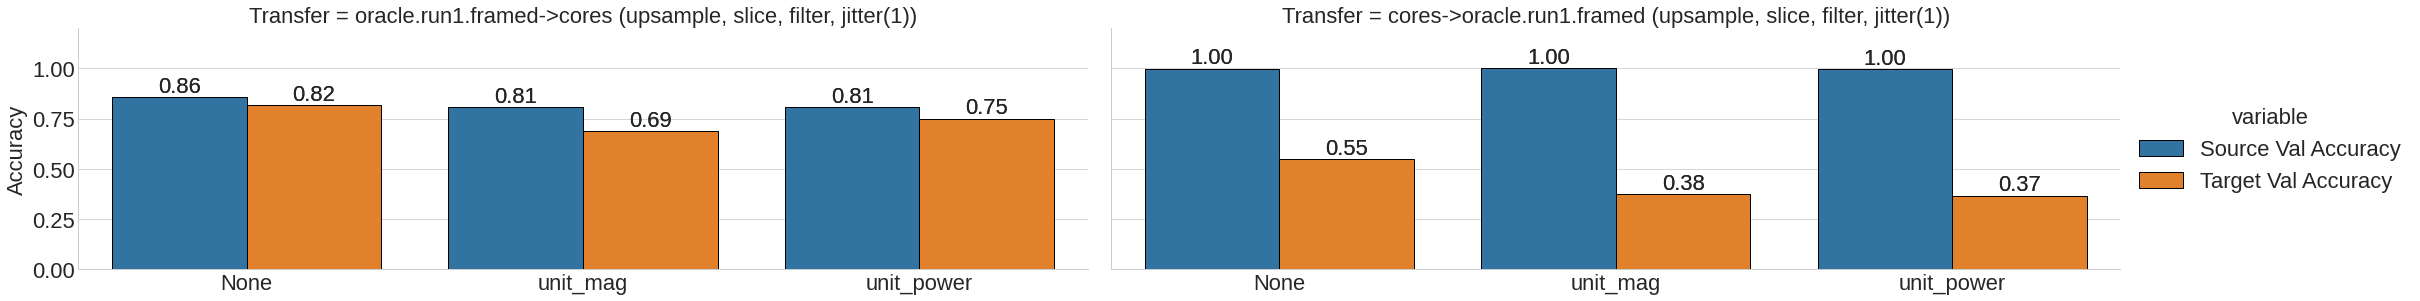

<Figure size 1080x3600 with 0 Axes>

In [41]:
t = helper_tl_3.get_best_trials()
t_A = get_tl_3_trials(t, "oracle.run1.framed", "jitter(1),take(200),upsample(25e6)", "cores", "jitter(1),filter(10e6),take(200)")
t_A["Transfer"] = "oracle.run1.framed->cores (upsample, slice, filter, jitter(1))"
t_A["Transform"] = t_A.apply(make_transform_string, axis=1)

t_B = get_tl_3_trials(t, "cores", "jitter(1),filter(10e6),take(200)", "oracle.run1.framed", "jitter(1),take(200),upsample(25e6)")
t_B["Transfer"] = "cores->oracle.run1.framed (upsample, slice, filter, jitter(1))"
t_B["Transform"] = t_B.apply(make_transform_string, axis=1)

t_f = pd.concat([t_A, t_B])

m = pd.melt(t_f, 
        id_vars=["Transfer", "Transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x="Transform", col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black",
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2


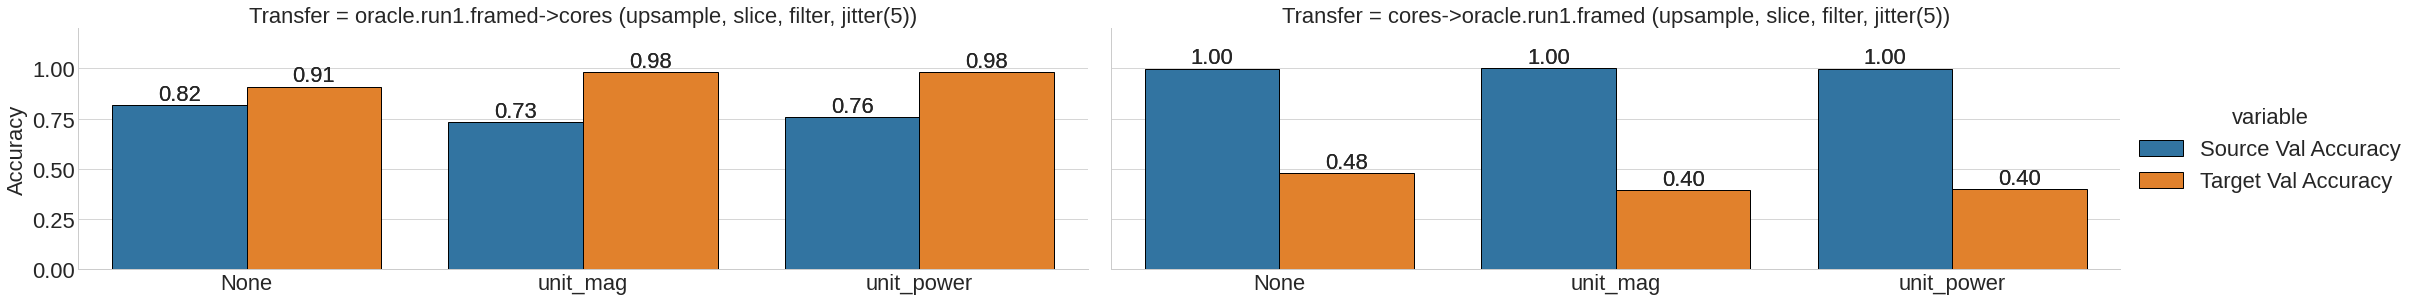

<Figure size 1080x3600 with 0 Axes>

In [42]:
t = helper_tl_3.get_best_trials()
t_A = get_tl_3_trials(t, "oracle.run1.framed", "jitter(5),take(200),upsample(25e6)", "cores", "jitter(5),filter(10e6),take(200)")
t_A["Transfer"] = "oracle.run1.framed->cores (upsample, slice, filter, jitter(5))"
t_A["Transform"] = t_A.apply(make_transform_string, axis=1)

t_B = get_tl_3_trials(t, "cores", "jitter(5),filter(10e6),take(200)", "oracle.run1.framed", "jitter(5),take(200),upsample(25e6)")
t_B["Transfer"] = "cores->oracle.run1.framed (upsample, slice, filter, jitter(5))"
t_B["Transform"] = t_B.apply(make_transform_string, axis=1)

t_f = pd.concat([t_A, t_B])

m = pd.melt(t_f, 
        id_vars=["Transfer", "Transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x="Transform", col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black",
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)

/mnt/wd500GB/CSC500/csc500-main/csc500-notebooks/experiments/tl_3v2


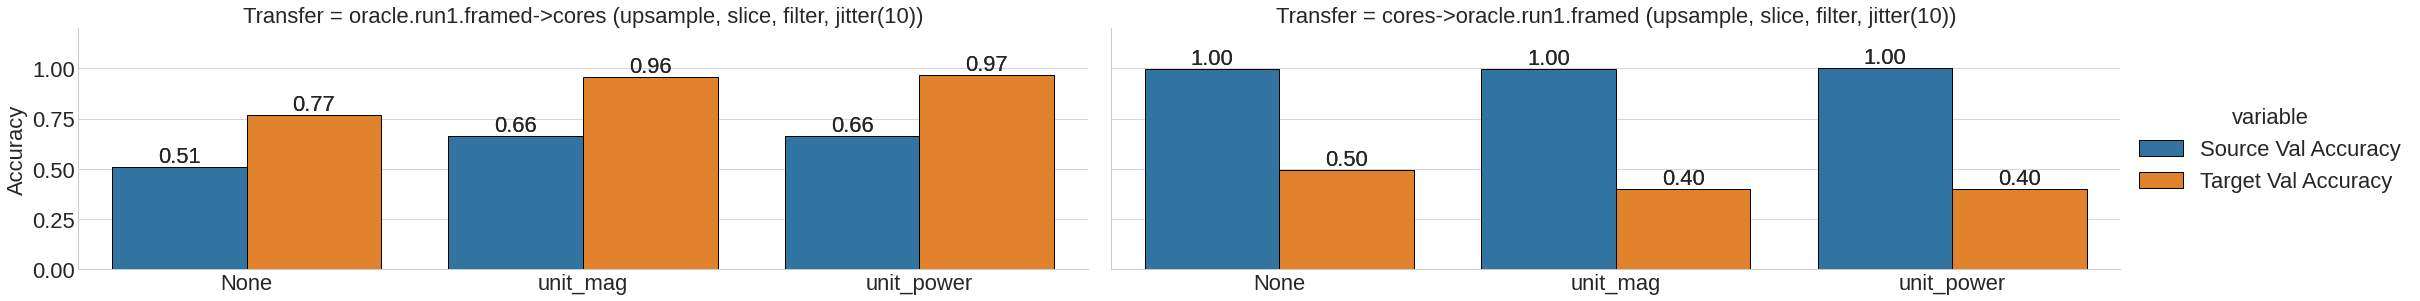

<Figure size 1080x3600 with 0 Axes>

In [45]:
t = helper_tl_3.get_best_trials()
t_A = get_tl_3_trials(t, "oracle.run1.framed", "jitter(10),take(200),upsample(25e6)", "cores", "jitter(10),filter(10e6),take(200)")
t_A["Transfer"] = "oracle.run1.framed->cores (upsample, slice, filter, jitter(10))"
t_A["Transform"] = t_A.apply(make_transform_string, axis=1)

t_B = get_tl_3_trials(t, "cores", "jitter(10),filter(10e6),take(200)", "oracle.run1.framed", "jitter(10),take(200),upsample(25e6)")
t_B["Transfer"] = "cores->oracle.run1.framed (upsample, slice, filter, jitter(10))"
t_B["Transform"] = t_B.apply(make_transform_string, axis=1)

t_f = pd.concat([t_A, t_B])

m = pd.melt(t_f, 
        id_vars=["Transfer", "Transform"],
        value_name="Accuracy",
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ])

fg = sb.catplot(x="Transform", col="Transfer", y='Accuracy', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black",
                )
fg.set_xlabels('')
plt.figure(figsize=(15,50))

set_nice_sb_style()
add_value_to_sb_bars(fg)
add_x_val_to_sb_bars(fg)